**全0 or 全1**

In [4]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))  #tf.ones 全1
y = tf.zeros(shape=(3, 2))  #tf.zeros 全0
print(x)
print(y)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)


In [5]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**隨機值**

In [7]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.) #平均0.多 標準差1.多
print(x)

tf.Tensor(
[[-0.77995825]
 [-0.48672962]
 [ 3.0440931 ]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.) #0~1之間
print(x)

tf.Tensor(
[[0.47062588]
 [0.49691617]
 [0.57618535]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [8]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**創造一個tensorflow變量**

In [9]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.15829483],
       [0.18639688],
       [0.13331866]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [10]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [11]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [12]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [13]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [15]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape: #GradientTape 梯度帶
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [16]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [17]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [18]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [19]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [20]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

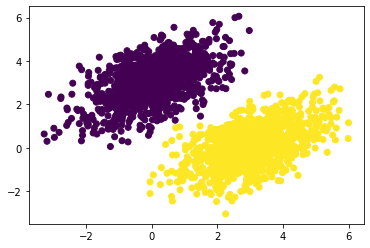

In [21]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [22]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [23]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [24]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [25]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [26]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.5870
Loss at step 1: 0.1830
Loss at step 2: 0.1131
Loss at step 3: 0.0960
Loss at step 4: 0.0882
Loss at step 5: 0.0824
Loss at step 6: 0.0773
Loss at step 7: 0.0727
Loss at step 8: 0.0685
Loss at step 9: 0.0647
Loss at step 10: 0.0612
Loss at step 11: 0.0580
Loss at step 12: 0.0551
Loss at step 13: 0.0525
Loss at step 14: 0.0501
Loss at step 15: 0.0479
Loss at step 16: 0.0458
Loss at step 17: 0.0440
Loss at step 18: 0.0423
Loss at step 19: 0.0408
Loss at step 20: 0.0394
Loss at step 21: 0.0381
Loss at step 22: 0.0370
Loss at step 23: 0.0359
Loss at step 24: 0.0349
Loss at step 25: 0.0340
Loss at step 26: 0.0332
Loss at step 27: 0.0325
Loss at step 28: 0.0318
Loss at step 29: 0.0312
Loss at step 30: 0.0307
Loss at step 31: 0.0301
Loss at step 32: 0.0297
Loss at step 33: 0.0293
Loss at step 34: 0.0289
Loss at step 35: 0.0285
Loss at step 36: 0.0282
Loss at step 37: 0.0279
Loss at step 38: 0.0276
Loss at step 39: 0.0274


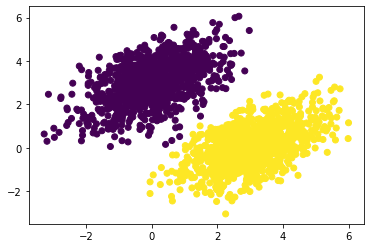

In [27]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

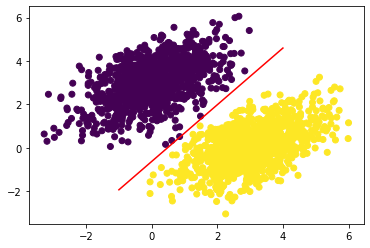

In [28]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

**A `Dense` layer implemented as a `Layer` subclass**

In [29]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

#### Automatic shape inference: Building layers on the fly

In [30]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [32]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

In [33]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [34]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

**Calling `fit()` with NumPy data**

In [35]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 7.8967 - binary_accuracy: 0.3205
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 7.5790 - binary_accuracy: 0.3115
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 7.3127 - binary_accuracy: 0.3030
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 7.0581 - binary_accuracy: 0.2970
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 6.8106 - binary_accuracy: 0.2945


In [36]:
history.history

{'loss': [7.8966965675354,
  7.578952312469482,
  7.3127055168151855,
  7.058141708374023,
  6.810604572296143],
 'binary_accuracy': [0.320499986410141,
  0.31150001287460327,
  0.30300000309944153,
  0.296999990940094,
  0.2944999933242798]}

**Using the `validation_data` argument**

In [37]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.1435 - binary_accuracy: 0.9179 - val_loss: 0.0580 - val_binary_accuracy: 0.9867
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0745 - binary_accuracy: 0.9607 - val_loss: 0.0556 - val_binary_accuracy: 1.0000
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0731 - binary_accuracy: 0.9550 - val_loss: 0.0384 - val_binary_accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0703 - binary_accuracy: 0.9650 - val_loss: 0.0339 - val_binary_accuracy: 1.0000
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0677 - binary_accuracy: 0.9529 - val_loss: 0.1355 - val_binary_accuracy: 0.9233


In [38]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[ 1.3653762 ]
 [ 0.24144351]
 [ 1.4723686 ]
 [ 0.1288675 ]
 [ 1.3255264 ]
 [ 1.3353046 ]
 [-0.00936598]
 [ 0.05086631]
 [ 1.461175  ]
 [ 0.32393992]]
